### Loading & Exploring Diamonds Data

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor 
    
import statsmodels.api as sm

import pingouin as pg 

import warnings
warnings.filterwarnings("ignore")

#### diamonds dataset

In [3]:
df_diamonds = sns.load_dataset("diamonds")

In [4]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


carat: The weight of the diamond, equivalent to 200mg (should be a good indicator)

cut: Quality of the cut

color: Color of the diamond from J to D (worst to best)

clarity: How clear the diamond is: I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

depth: Total depth percentage (relative to x and y). Will likely be collinear

table: Width of top of diamond relative to widest point(43-95)

price: In US dollars ($)

x,y,z: Dimnesions of the diamond

In [5]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [7]:
#missing values?
df_diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
print(df_diamonds.dtypes)

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object


In [14]:
#unique values of the most common at the top
df_diamonds.describe(include=["category"])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [17]:
#set color design
sns.set(color_codes=True)
colors = sns.color_palette("bright")

### https://seaborn.pydata.org/tutorial/color_palettes.html

In [19]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### data viz

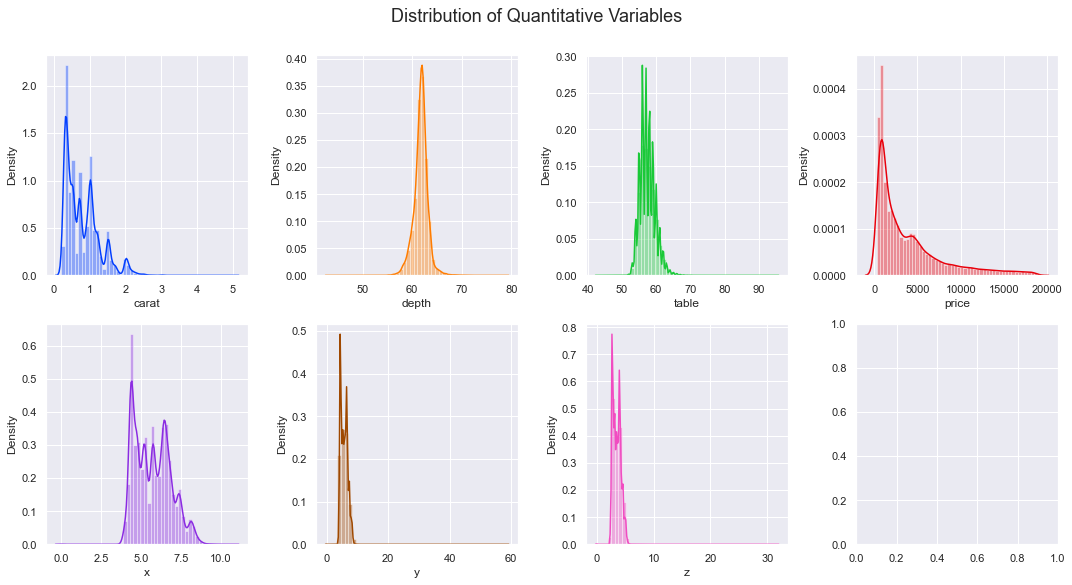

In [23]:
fig, axes = plt.subplots(2, 4, figsize = (15,8))

sns.distplot(df_diamonds["carat"], color = colors[0], ax = axes[0,0])
sns.distplot(df_diamonds["depth"], color = colors[1], ax = axes[0,1])
sns.distplot(df_diamonds["table"], color = colors[2], ax = axes[0,2])
sns.distplot(df_diamonds["price"], color = colors[3], ax = axes[0,3])
sns.distplot(df_diamonds["x"], color = colors[4], ax = axes[1,0])
sns.distplot(df_diamonds["y"], color = colors[5], ax = axes[1,1])
sns.distplot(df_diamonds["z"], color = colors[6], ax = axes[1,2])

plt.suptitle("Distribution of Quantitative Variables", y = 1.01, size = 18)
plt.tight_layout()
plt.show()

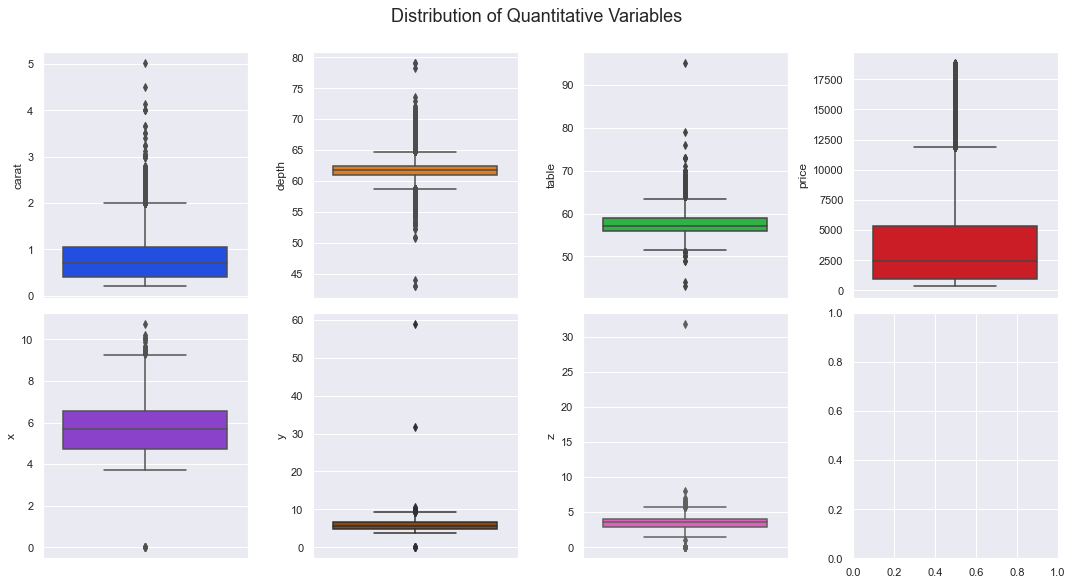

In [25]:
fig, axes = plt.subplots(2, 4, figsize = (15,8))

sns.boxplot(y=df_diamonds["carat"], color = colors[0], ax = axes[0,0])
sns.boxplot(y=df_diamonds["depth"], color = colors[1], ax = axes[0,1])
sns.boxplot(y=df_diamonds["table"], color = colors[2], ax = axes[0,2])
sns.boxplot(y=df_diamonds["price"], color = colors[3], ax = axes[0,3])
sns.boxplot(y=df_diamonds["x"], color = colors[4], ax = axes[1,0])
sns.boxplot(y=df_diamonds["y"], color = colors[5], ax = axes[1,1])
sns.boxplot(y=df_diamonds["z"], color = colors[6], ax = axes[1,2])

plt.suptitle("Distribution of Quantitative Variables", y = 1.01, size = 18)
plt.tight_layout()
plt.show()

### Categorical Coding & Data Splitting

In [28]:
weird_zeros = df_diamonds[(df_diamonds["x"] == 0) | (df_diamonds["y"] == 0) | (df_diamonds["z"] == 0)]

In [31]:
all_zeros = df_diamonds[(df_diamonds["x"] == 0) & (df_diamonds["y"] == 0) & (df_diamonds["z"] == 0)]

In [32]:
all_zeros

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [29]:
weird_zeros.shape

(20, 10)

In [30]:
weird_zeros

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [56]:
#copy the original data frame
df_diamondsX = df_diamonds.copy()

In [57]:
#opposite with the data + drop null values
df_diamondsX = df_diamondsX[~df_diamondsX.isin(weird_zeros)].dropna(how= "all")

In [58]:
#total count = 53940
#-weird_zeros = 20
#53920
df_diamondsX.shape

(53920, 10)

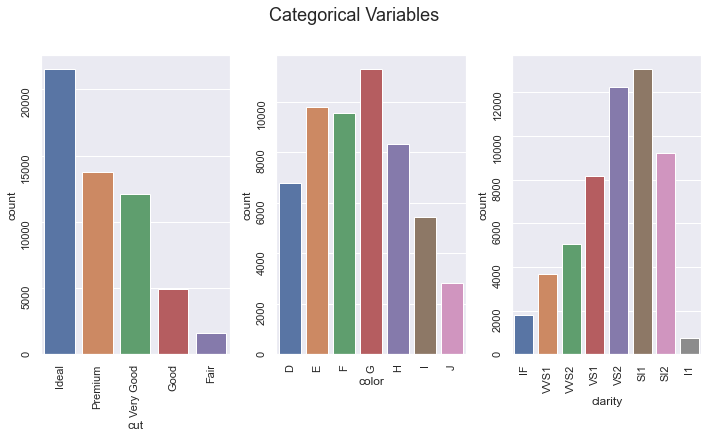

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6))

sns.countplot(x="cut", data=df_diamonds, ax=axes[0])
sns.countplot(x="color", data=df_diamonds, ax=axes[1])
sns.countplot(x="clarity", data=df_diamonds, ax=axes[2])

#quick look at the categorical variable
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    
plt.suptitle("Categorical Variables", y= 1.01, size = 18)
plt.tight_layout()
plt.show()

#### One-Hot-Encoding

In [60]:
new_cols = pd.get_dummies(df_diamondsX["cut"])
new_cols

,Ideal,Premium,Very Good,Good,Fair
0,True,False,False,False,False
1,False,True,False,False,False
2,False,False,False,True,False
3,False,True,False,False,False
4,False,False,False,True,False
...,...,...,...,...,...
53935,True,False,False,False,False
53936,False,False,False,True,False
53937,False,False,True,False,False
53938,False,True,False,False,False


In [61]:
#redefine the dataframe
df_diamondsX = df_diamondsX.drop(["color","clarity","cut"], axis = 1)

In [62]:
df_diamondsX

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757.0,6.15,6.12,3.74


In [63]:
#put all together
df = pd.concat([df_diamondsX, new_cols], axis = 1)

In [64]:
df

,carat,depth,table,price,x,y,z,Ideal,Premium,Very Good,Good,Fair
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,True,False,False,False,False
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,False,True,False,False,False
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31,False,False,False,True,False
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,False,True,False,False,False
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50,True,False,False,False,False
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61,False,False,False,True,False
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56,False,False,True,False,False
53938,0.86,61.0,58.0,2757.0,6.15,6.12,3.74,False,True,False,False,False


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53920 non-null  float64
 1   depth      53920 non-null  float64
 2   table      53920 non-null  float64
 3   price      53920 non-null  float64
 4   x          53920 non-null  float64
 5   y          53920 non-null  float64
 6   z          53920 non-null  float64
 7   Ideal      53920 non-null  bool   
 8   Premium    53920 non-null  bool   
 9   Very Good  53920 non-null  bool   
 10  Good       53920 non-null  bool   
 11  Fair       53920 non-null  bool   
dtypes: bool(5), float64(7)
memory usage: 3.5 MB


#### Splitting the data

In [66]:
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 32)

In [67]:
Y_test = test_df["price"]

X_test = test_df.drop(columns = ["price"], axis = 1)

Y_train = train_df["price"]

X_train = train_df.drop(columns = ["price"], axis = 1)

#### our evaluation function 

In [68]:
def error_metrics(y_true, y_pred):
    mean_abs = "Mean Absolute Error: {}".format(mean_absolute_error(y_true, y_pred))
    mean_squared = "Mean Square Error: {}".format(mean_squared_error(y_true, y_pred))
    r2 = "r2 score: {}".format(r2_score(y_true, y_pred))
    return mean_abs, mean_squared, r2

#### Linear Regression

In [69]:
linear_regression = LinearRegression()

#### fit it

In [70]:
linear_regression.fit(X_train, Y_train) 

LinearRegression()

In [72]:
#intercept
print(linear_regression.intercept_)

10181.915587137742


In [73]:
#coeficient
print(linear_regression.coef_)

[ 1.08607980e+04 -8.47180814e+01 -4.47995132e+01 -9.32136938e+02
  8.58589044e+01 -7.16093794e+02  4.72284373e+02  2.09546016e+02
  2.81136549e+02  7.02304221e+00 -9.69989981e+02]


#### Building Predictions

In [74]:
Y_pred_linear = linear_regression.predict(X_test)

In [75]:
Y_pred_linear

array([3275.45726279,  736.6651985 , 4108.88179593, ..., 4087.19966186,
       3003.15922589,  276.18091793])

In [76]:
linear_comparison = pd.DataFrame({"Actual":Y_test, "Predicted":Y_pred_linear})

In [77]:
linear_comparison

,Actual,Predicted
870,2872.0,3275.457263
30111,720.0,736.665199
7191,4187.0,4108.881796
2152,3127.0,3399.928777
1612,3012.0,3344.339693
...,...,...
46361,1760.0,2218.596421
15399,6169.0,5943.141659
51624,2396.0,4087.199662
46355,1760.0,3003.159226


#### accuracy

In [78]:
error_metrics(Y_test, Y_pred_linear)

('Mean Absolute Error: 868.7838263415291',
 'Mean Square Error: 2128771.9965016167',
 'r2 score: 0.8664657601803931')

#### another method

In [80]:
linear_comparison["Diff"] = np.abs(linear_comparison["Actual"] - linear_comparison["Predicted"])

In [81]:
linear_comparison.head(5)

,Actual,Predicted,Diff
870,2872.0,3275.457263,403.457263
30111,720.0,736.665199,16.665199
7191,4187.0,4108.881796,78.118204
2152,3127.0,3399.928777,272.928777
1612,3012.0,3344.339693,332.339693


In [82]:
#check how the dataframe works
linear_comparison["Dist100"] = ["Yes" if x <= 100.00 else "No" for x in linear_comparison["Diff"]]

linear_comparison["Dist500"] = ["Yes" if x <= 500.00 else "No" for x in linear_comparison["Diff"]]

In [83]:
linear_comparison.head(5)

,Actual,Predicted,Diff,Dist100,Dist500
870,2872.0,3275.457263,403.457263,No,Yes
30111,720.0,736.665199,16.665199,Yes,Yes
7191,4187.0,4108.881796,78.118204,Yes,Yes
2152,3127.0,3399.928777,272.928777,No,Yes
1612,3012.0,3344.339693,332.339693,No,Yes


In [84]:
#count Dist100
linear_comparison["Dist100"].value_counts()

Dist100
No     13982
Yes     2194
Name: count, dtype: int64

In [85]:
#pretty low at 13,5% accuracy
2194/(13982+2194)

0.13563303659742829

In [86]:
#count Dist500
linear_comparison["Dist500"].value_counts()

Dist500
Yes    8549
No     7627
Name: count, dtype: int64

In [88]:
#a little over 50%....thats not a very good advertising pitch here
8549/(8549+7627)

0.5284990108803165

#### Statsmodels Version

In [98]:
# Verify the data types of the columns in Y_train and X_train
print(Y_train.dtypes)
print(X_train.dtypes)

# Convert columns to numeric type if required
Y_train = Y_train.astype(float)
X_train = X_train.astype(float)

# Continue with the original code
model_linear = sm.OLS(Y_train, X_train)
linear_stats_model = model_linear.fit()
print(linear_stats_model.summary())

float64
carat        float64
depth        float64
table        float64
x            float64
y            float64
z            float64
Ideal           bool
Premium         bool
Very Good       bool
Good            bool
Fair            bool
dtype: object
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 2.326e+04
Date:                Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:11:44   Log-Likelihood:            -3.2930e+05
No. Observations:               37744   AIC:                         6.586e+05
Df Residuals:                   37733   BIC:                         6.587e+05
Df Model:                          10                                         
Covariance Type:            nonrobus

#### Linear ping

In [99]:
linear_ping = pg.linear_regression(X_train[["x","y","z"]], Y_train)
linear_ping

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-14194.266287,49.514073,-286.671352,0.000000e+00,0.786796,0.786779,-14291.315199,-14097.217374
1,x,2541.628533,64.601138,39.343402,0.000000e+00,0.786796,0.786779,2415.008569,2668.248497
2,y,83.975036,32.279599,2.601489,9.285614e-03,0.786796,0.786779,20.706156,147.243916
3,z,869.335212,102.839365,8.453331,2.931102e-17,0.786796,0.786779,667.767295,1070.903128
